<a href="https://colab.research.google.com/github/asrianda/jurnal/blob/main/jurnal_SVM_Ilkom1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('email_phishing_data.csv')
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [ ]:
#df.isnull().sum()
df['label'].value_counts()

,count
label,
0,517897
1,6949


In [ ]:
df.isnull().sum()

,0
num_words,0
num_unique_words,0
num_stopwords,0
num_links,0
num_unique_domains,0
num_email_addresses,0
num_spelling_errors,0
num_urgent_keywords,0
label,0


In [ ]:
#df = df.dropna()
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


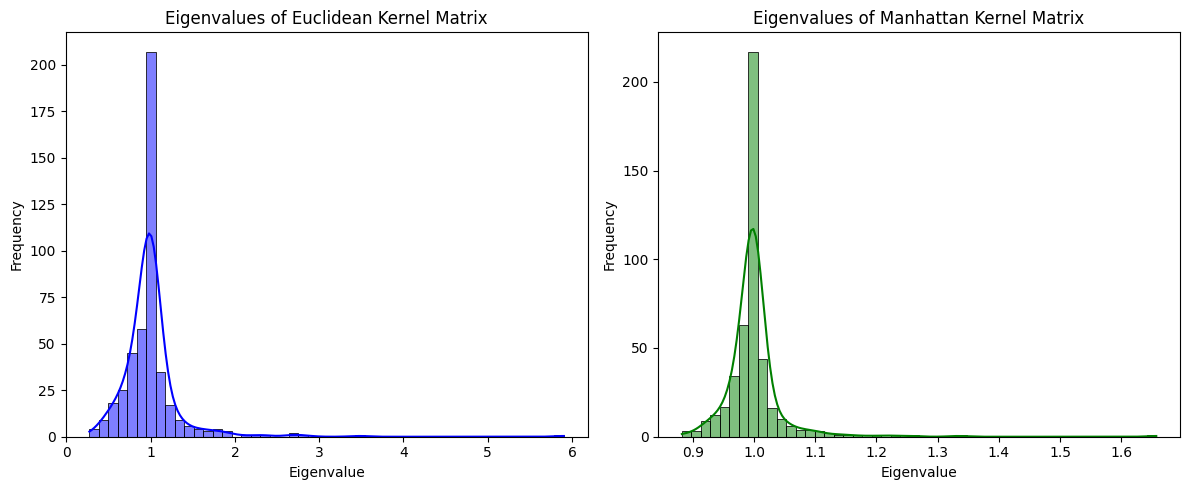

1. Akurasi dengan RBF Euclidean Kernel: 78.07 %
2. Akurasi dengan RBF Manhattan Kernel: 62.28 %
3. Minimum eigenvalue Euclidean: 0.2722
4. Minimum eigenvalue Manhattan: 0.8821


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# =========================
# Fungsi Kernel RBF (Euclidean & Manhattan)
# =========================
def rbf_kernel(X, Y, gamma=0.5, mode='euclidean'):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            if mode == 'euclidean':
                dist = np.linalg.norm(X[i] - Y[j]) ** 2
            elif mode == 'manhattan':
                dist = np.sum(np.abs(X[i] - Y[j]))
            else:
                raise ValueError("Unsupported distance metric")
            K[i, j] = np.exp(-gamma * dist)
    return K

# =========================
# Muat dan Standarisasi Dataset
# =========================
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

# =========================
# Split Data
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# Hitung Kernel & Latih SVM
# =========================
gamma = 0.5
K_train_euc = rbf_kernel(X_train, X_train, gamma=gamma, mode='euclidean')
K_test_euc = rbf_kernel(X_test, X_train, gamma=gamma, mode='euclidean')

K_train_man = rbf_kernel(X_train, X_train, gamma=gamma, mode='manhattan')
K_test_man = rbf_kernel(X_test, X_train, gamma=gamma, mode='manhattan')

svm_euc = SVC(kernel='precomputed')
svm_euc.fit(K_train_euc, y_train)
y_pred_euc = svm_euc.predict(K_test_euc)
acc_euc = accuracy_score(y_test, y_pred_euc)

svm_man = SVC(kernel='precomputed')
svm_man.fit(K_train_man, y_train)
y_pred_man = svm_man.predict(K_test_man)
acc_man = accuracy_score(y_test, y_pred_man)

# =========================
# Evaluasi PSD dengan Eigenvalue
# =========================
eigvals_euc = np.linalg.eigvalsh(K_train_euc)
eigvals_man = np.linalg.eigvalsh(K_train_man)

# =========================
# Visualisasi Histogram Eigenvalue
# =========================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(eigvals_euc, bins=50, kde=True, color="blue")
plt.title("Eigenvalues of Euclidean Kernel Matrix")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(eigvals_man, bins=50, kde=True, color="green")
plt.title("Eigenvalues of Manhattan Kernel Matrix")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# =========================
# Cetak Hasil Evaluasi
# =========================
print("1. Akurasi dengan RBF Euclidean Kernel:", round(acc_euc * 100, 2), "%")
print("2. Akurasi dengan RBF Manhattan Kernel:", round(acc_man * 100, 2), "%")
print("3. Minimum eigenvalue Euclidean:", round(np.min(eigvals_euc), 4))
print("4. Minimum eigenvalue Manhattan:", round(np.min(eigvals_man), 4))


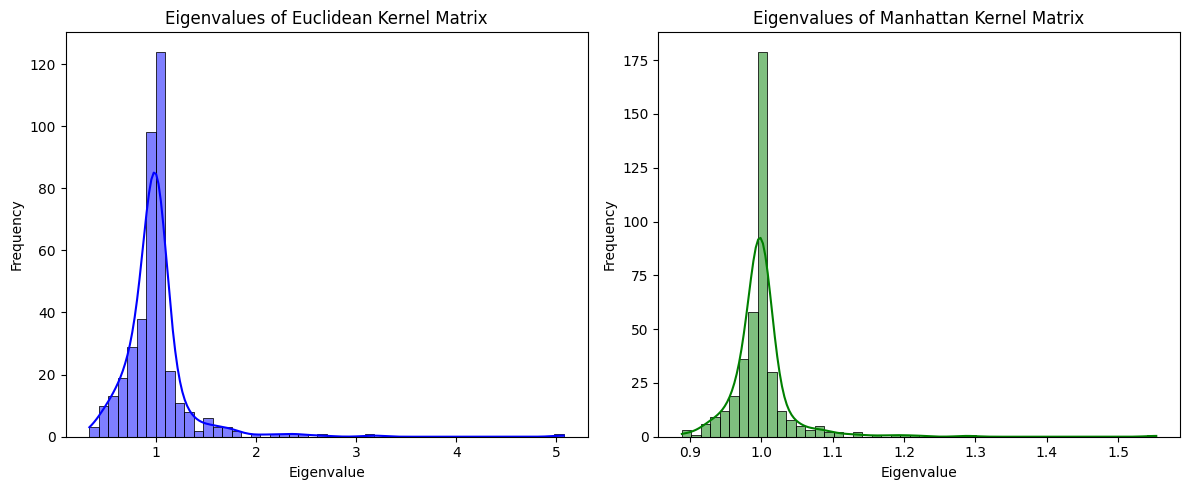

1. Akurasi dengan RBF Euclidean Kernel: 80.7 %
2. Akurasi dengan RBF Manhattan Kernel: 63.16 %
3. Minimum eigenvalue Euclidean: 0.3362
4. Minimum eigenvalue Manhattan: 0.8887


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# =========================
# Fungsi Kernel RBF (Euclidean & Manhattan)
# =========================
def rbf_kernel(X, Y, gamma=0.5, mode='euclidean'):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            if mode == 'euclidean':
                dist = np.linalg.norm(X[i] - Y[j]) ** 2
                K[i, j] = np.exp(-gamma * dist)
            elif mode == 'manhattan':
                dist = np.sum(np.abs(X[i] - Y[j]))
                K[i, j] = np.exp(-gamma * dist)  # ← Sesuai rumus ∑|xi - xj|
            else:
                raise ValueError("Unsupported distance metric")
    return K

# =========================
# Muat dan Standarisasi Dataset
# =========================
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

# =========================
# Split Data
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =========================
# Hitung Kernel & Latih SVM
# =========================
gamma = 0.5
K_train_euc = rbf_kernel(X_train, X_train, gamma=gamma, mode='euclidean')
K_test_euc = rbf_kernel(X_test, X_train, gamma=gamma, mode='euclidean')

K_train_man = rbf_kernel(X_train, X_train, gamma=gamma, mode='manhattan')
K_test_man = rbf_kernel(X_test, X_train, gamma=gamma, mode='manhattan')

svm_euc = SVC(kernel='precomputed')
svm_euc.fit(K_train_euc, y_train)
y_pred_euc = svm_euc.predict(K_test_euc)
acc_euc = accuracy_score(y_test, y_pred_euc)

svm_man = SVC(kernel='precomputed')
svm_man.fit(K_train_man, y_train)
y_pred_man = svm_man.predict(K_test_man)
acc_man = accuracy_score(y_test, y_pred_man)

# =========================
# Evaluasi PSD dengan Eigenvalue
# =========================
eigvals_euc = np.linalg.eigvalsh(K_train_euc)
eigvals_man = np.linalg.eigvalsh(K_train_man)

# =========================
# Visualisasi Histogram Eigenvalue
# =========================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(eigvals_euc, bins=50, kde=True, color="blue")
plt.title("Eigenvalues of Euclidean Kernel Matrix")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(eigvals_man, bins=50, kde=True, color="green")
plt.title("Eigenvalues of Manhattan Kernel Matrix")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# =========================
# Cetak Hasil Evaluasi
# =========================
print("1. Akurasi dengan RBF Euclidean Kernel:", round(acc_euc * 100, 2), "%")
print("2. Akurasi dengan RBF Manhattan Kernel:", round(acc_man * 100, 2), "%")
print("3. Minimum eigenvalue Euclidean:", round(np.min(eigvals_euc), 4))
print("4. Minimum eigenvalue Manhattan:", round(np.min(eigvals_man), 4))


**Perbandingan AKurasi SVM Manhattan dan Euclidean**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# =========================
# Fungsi Kernel RBF (Euclidean & Manhattan)
# =========================
def rbf_kernel(X, Y, gamma=0.5, mode='euclidean'):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            if mode == 'euclidean':
                dist = np.linalg.norm(X[i] - Y[j]) ** 2
                K[i, j] = np.exp(-gamma * dist)
            elif mode == 'manhattan':
                dist = np.sum(np.abs(X[i] - Y[j]))
                K[i, j] = np.exp(-gamma * dist)  # Sesuai rumus exp(-γ ∑ |x_ik - x_jk|)
            else:
                raise ValueError("Unsupported distance metric")
    return K

# =========================
# Muat Dataset dan Standarisasi
# =========================
# Misal 'df' sudah dibaca sebelumnya, misalnya: df = pd.read_csv('datamu.csv')

fitur = ['num_stopwords', 'num_links', 'num_unique_domains',
         'num_email_addresses', 'num_spelling_errors', 'num_urgent_keywords']
target = 'label'

X = df[fitur].values
y = df[target].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

# =========================
# Split Data
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =========================
# Hitung Kernel & Latih SVM
# =========================
gamma = 0.5
K_train_euc = rbf_kernel(X_train, X_train, gamma=gamma, mode='euclidean')
K_test_euc = rbf_kernel(X_test, X_train, gamma=gamma, mode='euclidean')

K_train_man = rbf_kernel(X_train, X_train, gamma=gamma, mode='manhattan')
K_test_man = rbf_kernel(X_test, X_train, gamma=gamma, mode='manhattan')

svm_euc = SVC(kernel='precomputed')
svm_euc.fit(K_train_euc, y_train)
y_pred_euc = svm_euc.predict(K_test_euc)
acc_euc = accuracy_score(y_test, y_pred_euc)

svm_man = SVC(kernel='precomputed')
svm_man.fit(K_train_man, y_train)
y_pred_man = svm_man.predict(K_test_man)
acc_man = accuracy_score(y_test, y_pred_man)

# =========================
# Evaluasi PSD dengan Eigenvalue
# =========================
eigvals_euc = np.linalg.eigvalsh(K_train_euc)
eigvals_man = np.linalg.eigvalsh(K_train_man)

# =========================
# Visualisasi Histogram Eigenvalue
# =========================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(eigvals_euc, bins=50, kde=True, color="blue")
plt.title("Eigenvalues of Euclidean Kernel Matrix")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(eigvals_man, bins=50, kde=True, color="green")
plt.title("Eigenvalues of Manhattan Kernel Matrix")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# =========================
# Cetak Hasil Evaluasi
# =========================
print("1. Akurasi dengan RBF Euclidean Kernel:", round(acc_euc * 100, 2), "%")
print("2. Akurasi dengan RBF Manhattan Kernel:", round(acc_man * 100, 2), "%")
print("3. Minimum eigenvalue Euclidean:", round(np.min(eigvals_euc), 4))
print("4. Minimum eigenvalue Manhattan:", round(np.min(eigvals_man), 4))


In [ ]:
import pandas as pd
from sklearn.utils import resample

# Misal dataset awal sudah dalam dataframe
# Contoh:
# df = pd.read_csv('data.csv')
# dengan kolom 'label' sebagai target

# Simulasi contoh dataframe:
# Ini harus kamu ganti dengan data aslimu
#df = your_actual_dataframe

# Pisahkan data berdasarkan label
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]

# Tentukan jumlah data label 0 yang diambil (3x dari label 1)
n_label1 = len(df_label_1)       # 6949
n_label0_target = 3 * n_label1   # 3 * 6949 = 20847

# Ambil sample acak dari label 0
df_label_0_sampled = resample(df_label_0,
                              replace=False,  # tanpa pengembalian
                              n_samples=n_label0_target,
                              random_state=42)

# Gabungkan data label 0 (sampled) dan label 1
df_balanced = pd.concat([df_label_0_sampled, df_label_1])

# Acak ulang (shuffle)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# =========================
# Cek hasil
# =========================
print("Jumlah data setelah penyeimbangan:")
print(df_balanced['label'].value_counts())

# Kalau mau, simpan ke file baru
# df_balanced.to_csv('balanced_data.csv', index=False)


In [3]:
import pandas as pd

# =========================
# Load Dataset
# =========================
df = pd.read_csv('email_phishing_data.csv')

# Pastikan kolom target ada (ubah sesuai nama kolom label di file)
target_column = 'label'  # Misal nama kolom target = 'label'

# =========================
# Pisahkan Data Berdasarkan Label
# =========================
df_label_0 = df[df[target_column] == 0]
df_label_1 = df[df[target_column] == 1]

print(f"Jumlah data awal:")
print(f"Label 0: {len(df_label_0)} data")
print(f"Label 1: {len(df_label_1)} data\n")

# =========================
# Sampling Data
# =========================
# Ambil seluruh data label 1
df_label_1_sampled = df_label_1.copy()

# Ambil 3x jumlah label 1 dari label 0 (secara random)
n_label_0_needed = len(df_label_1_sampled) * 2
df_label_0_sampled = df_label_0.sample(n=n_label_0_needed, random_state=42)

# Gabungkan
df_balanced = pd.concat([df_label_0_sampled, df_label_1_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# =========================
# Cek Hasil
# =========================
print(f"Jumlah data setelah sampling:")
print(df_balanced[target_column].value_counts())

# =========================
# Simpan Jika Perlu
# =========================
# df_balanced.to_csv('email_phishing_balanced.csv', index=False)


Jumlah data awal:
Label 0: 517897 data
Label 1: 6949 data

Jumlah data setelah sampling:
label
0    13898
1     6949
Name: count, dtype: int64


In [4]:
import pandas as pd

# =========================
# Load Dataset
# =========================
df = pd.read_csv('email_phishing_data.csv')

# Pastikan kolom target ada (ubah sesuai nama kolom label di file)
target_column = 'label'  # Misal nama kolom target = 'label'

# =========================
# Pisahkan Data Berdasarkan Label
# =========================
df_label_0 = df[df[target_column] == 0]
df_label_1 = df[df[target_column] == 1]

print(f"Jumlah data awal:")
print(f"Label 0: {len(df_label_0)} data")
print(f"Label 1: {len(df_label_1)} data\n")

# =========================
# Sampling Data
# =========================
# Ambil 1200 data label 1 (acak)
if len(df_label_1) >= 1200:
    df_label_1_sampled = df_label_1.sample(n=1200, random_state=42)
else:
    raise ValueError(f"Data label 1 kurang dari 1200! Hanya tersedia {len(df_label_1)} data.")

# Ambil 3x jumlah label 1 dari label 0 (3600 data)
n_label_0_needed = 2 * len(df_label_1_sampled)

if len(df_label_0) >= n_label_0_needed:
    df_label_0_sampled = df_label_0.sample(n=n_label_0_needed, random_state=42)
else:
    raise ValueError(f"Data label 0 kurang dari {n_label_0_needed}! Hanya tersedia {len(df_label_0)} data.")

# Gabungkan dan acak
df_balanced = pd.concat([df_label_0_sampled, df_label_1_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# =========================
# Cek Hasil
# =========================
print(f"Jumlah data setelah sampling:")
print(df_balanced[target_column].value_counts())

# =========================
# Simpan Jika Perlu
# =========================
# df_balanced.to_csv('email_phishing_balanced.csv', index=False)


Jumlah data awal:
Label 0: 517897 data
Label 1: 6949 data

Jumlah data setelah sampling:
label
0    2400
1    1200
Name: count, dtype: int64


**Mencari Perbandingan antara Euclidean dan Manhattan dengan Gamma dan C sama**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

# =========================
# Fungsi Kernel RBF (Euclidean & Manhattan)
# =========================
def rbf_kernel(X, Y, gamma=0.5, mode='euclidean'):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            if mode == 'euclidean':
                dist = np.linalg.norm(X[i] - Y[j]) ** 2
                K[i, j] = np.exp(-gamma * dist)
            elif mode == 'manhattan':
                dist = np.sum(np.abs(X[i] - Y[j]))
                K[i, j] = np.exp(-gamma * dist)
            else:
                raise ValueError("Unsupported distance metric")
    return K

# =========================
# Muat dan Siapkan Dataset
# =========================
# Load data
#df_balanced = pd.read_csv('email_phishing_data.csv')

# Pastikan nama kolom label
target_column = 'label'  # Ubah kalau nama label berbeda

# Pisahkan data berdasarkan label
df_label_0 = df_balanced[df_balanced[target_column] == 0]
df_label_1 = df_balanced[df_balanced[target_column] == 1]

# Sampling: 3x jumlah label 1 untuk label 0
n_label_0_needed = len(df_label_1) * 3

if n_label_0_needed <= len(df_label_0):
    df_label_0_sampled = df_label_0.sample(n=n_label_0_needed, random_state=42)
else:
    print("Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.")
    df_label_0_sampled = df_label_0.copy()

# Gabung dan acak
df_balanced = pd.concat([df_label_0_sampled, df_label_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Pisahkan fitur dan target
X = df_balanced.drop(columns=[target_column]).values
y = df_balanced[target_column].values

# Standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)

# =========================
# Split Data
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# =========================
# Random Search dengan Gamma dan C Sama
# =========================
n_iter = 20
best_acc_euc = 0
best_acc_man = 0
best_params_euc = {'C': None, 'gamma': None}
best_params_man = {'C': None, 'gamma': None}

print("\n==== Random Search dengan C dan Gamma Sama ====")
for i in range(n_iter):
    C = uniform(0.1, 10).rvs()
    gamma = uniform(0.001, 1).rvs()

    # Euclidean
    K_train_euc = rbf_kernel(X_train, X_train, gamma=gamma, mode='euclidean')
    K_test_euc = rbf_kernel(X_test, X_train, gamma=gamma, mode='euclidean')
    svm_euc = SVC(kernel='precomputed', C=C)
    svm_euc.fit(K_train_euc, y_train)
    y_pred_euc = svm_euc.predict(K_test_euc)
    acc_euc = accuracy_score(y_test, y_pred_euc)

    # Manhattan
    K_train_man = rbf_kernel(X_train, X_train, gamma=gamma, mode='manhattan')
    K_test_man = rbf_kernel(X_test, X_train, gamma=gamma, mode='manhattan')
    svm_man = SVC(kernel='precomputed', C=C)
    svm_man.fit(K_train_man, y_train)
    y_pred_man = svm_man.predict(K_test_man)
    acc_man = accuracy_score(y_test, y_pred_man)

    print(f"Iterasi {i+1}: C={C:.4f}, gamma={gamma:.4f}, Acc Euclidean={acc_euc:.4f}, Acc Manhattan={acc_man:.4f}")

    if acc_euc > best_acc_euc:
        best_acc_euc = acc_euc
        best_params_euc['C'] = C
        best_params_euc['gamma'] = gamma

    if acc_man > best_acc_man:
        best_acc_man = acc_man
        best_params_man['C'] = C
        best_params_man['gamma'] = gamma

# =========================
# Cetak Hasil Akhir
# =========================
print("\n=== Hasil Terbaik ===")
print(f"Euclidean Kernel -> Akurasi: {round(best_acc_euc*100, 2)}%, Best C: {best_params_euc['C']:.4f}, Best gamma: {best_params_euc['gamma']:.4f}")
print(f"Manhattan Kernel -> Akurasi: {round(best_acc_man*100, 2)}%, Best C: {best_params_man['C']:.4f}, Best gamma: {best_params_man['gamma']:.4f}")

if best_acc_euc > best_acc_man:
    print("\n>>> Kernel Euclidean lebih unggul.")
elif best_acc_man > best_acc_euc:
    print("\n>>> Kernel Manhattan lebih unggul.")
else:
    print("\n>>> Akurasi kedua kernel seimbang.")



==== Random Search dengan C dan Gamma Sama ====
Iterasi 1: C=7.6606, gamma=0.8507, Acc Euclidean=0.7951, Acc Manhattan=0.8028
Iterasi 2: C=8.4110, gamma=0.0967, Acc Euclidean=0.7750, Acc Manhattan=0.7986
Iterasi 3: C=1.7203, gamma=0.5105, Acc Euclidean=0.7694, Acc Manhattan=0.7951
Iterasi 4: C=9.7683, gamma=0.1001, Acc Euclidean=0.7743, Acc Manhattan=0.7979
Iterasi 5: C=1.7888, gamma=0.3615, Acc Euclidean=0.7708, Acc Manhattan=0.7944


KeyboardInterrupt: 

In [3]:
df_balanced.shape

NameError: name 'df_balanced' is not defined

### **Perbandingan Akurasi RBF Eucludien dan Manhattan dengan Waktu**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time  # Tambahkan ini
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

# =========================
# Fungsi Kernel RBF (Euclidean & Manhattan)
# =========================
def rbf_kernel(X, Y, gamma=0.5, mode='euclidean'):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            if mode == 'euclidean':
                dist = np.linalg.norm(X[i] - Y[j]) ** 2
                K[i, j] = np.exp(-gamma * dist)
            elif mode == 'manhattan':
                dist = np.sum(np.abs(X[i] - Y[j]))
                K[i, j] = np.exp(-gamma * dist)
            else:
                raise ValueError("Unsupported distance metric")
    return K

# =========================
# Muat dan Siapkan Dataset
# =========================
# Load data
# df_balanced = pd.read_csv('email_phishing_data.csv')

# Pastikan nama kolom label
target_column = 'label'  # Ubah kalau nama label berbeda

# Pisahkan data berdasarkan label
df_label_0 = df_balanced[df_balanced[target_column] == 0]
df_label_1 = df_balanced[df_balanced[target_column] == 1]

# Sampling: 3x jumlah label 1 untuk label 0
n_label_0_needed = len(df_label_1) * 3

if n_label_0_needed <= len(df_label_0):
    df_label_0_sampled = df_label_0.sample(n=n_label_0_needed, random_state=42)
else:
    print("Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.")
    df_label_0_sampled = df_label_0.copy()

# Gabung dan acak
df_balanced = pd.concat([df_label_0_sampled, df_label_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Pisahkan fitur dan target
X = df_balanced.drop(columns=[target_column]).values
y = df_balanced[target_column].values

# Standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)

# =========================
# Split Data
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# =========================
# Random Search dengan Gamma dan C Sama
# =========================
n_iter = 15
best_acc_euc = 0
best_acc_man = 0
best_params_euc = {'C': None, 'gamma': None}
best_params_man = {'C': None, 'gamma': None}

print("\n==== Random Search dengan C dan Gamma Sama ====")

# Tambahkan start timing
start_time = time.time()

for i in range(n_iter):
    C = uniform(0.1, 10).rvs()
    gamma = uniform(0.001, 1).rvs()

    # Euclidean
    K_train_euc = rbf_kernel(X_train, X_train, gamma=gamma, mode='euclidean')
    K_test_euc = rbf_kernel(X_test, X_train, gamma=gamma, mode='euclidean')
    svm_euc = SVC(kernel='precomputed', C=C)
    svm_euc.fit(K_train_euc, y_train)
    y_pred_euc = svm_euc.predict(K_test_euc)
    acc_euc = accuracy_score(y_test, y_pred_euc)

    # Manhattan
    K_train_man = rbf_kernel(X_train, X_train, gamma=gamma, mode='manhattan')
    K_test_man = rbf_kernel(X_test, X_train, gamma=gamma, mode='manhattan')
    svm_man = SVC(kernel='precomputed', C=C)
    svm_man.fit(K_train_man, y_train)
    y_pred_man = svm_man.predict(K_test_man)
    acc_man = accuracy_score(y_test, y_pred_man)

    print(f"Iterasi {i+1}: C={C:.4f}, gamma={gamma:.4f}, Acc Euclidean={acc_euc:.4f}, Acc Manhattan={acc_man:.4f}")

    if acc_euc > best_acc_euc:
        best_acc_euc = acc_euc
        best_params_euc['C'] = C
        best_params_euc['gamma'] = gamma

    if acc_man > best_acc_man:
        best_acc_man = acc_man
        best_params_man['C'] = C
        best_params_man['gamma'] = gamma

# Tambahkan end timing
end_time = time.time()

# Hitung waktu
elapsed_time = end_time - start_time
print(f"\nTotal waktu eksekusi Random Search: {elapsed_time:.2f} detik ({elapsed_time/60:.2f} menit)")

# =========================
# Cetak Hasil Akhir
# =========================
print("\n=== Hasil Terbaik ===")
print(f"Euclidean Kernel -> Akurasi: {round(best_acc_euc*100, 2)}%, Best C: {best_params_euc['C']:.4f}, Best gamma: {best_params_euc['gamma']:.4f}")
print(f"Manhattan Kernel -> Akurasi: {round(best_acc_man*100, 2)}%, Best C: {best_params_man['C']:.4f}, Best gamma: {best_params_man['gamma']:.4f}")

if best_acc_euc > best_acc_man:
    print("\n>>> Kernel Euclidean lebih unggul.")
elif best_acc_man > best_acc_euc:
    print("\n>>> Kernel Manhattan lebih unggul.")
else:
    print("\n>>> Akurasi kedua kernel seimbang.")


Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.

==== Random Search dengan C dan Gamma Sama ====
Iterasi 1: C=0.5856, gamma=0.6472, Acc Euclidean=0.6972, Acc Manhattan=0.7407
Iterasi 2: C=3.3226, gamma=0.8169, Acc Euclidean=0.7537, Acc Manhattan=0.7546
Iterasi 3: C=2.6065, gamma=0.5805, Acc Euclidean=0.7417, Acc Manhattan=0.7574
Iterasi 4: C=1.3985, gamma=0.6297, Acc Euclidean=0.7259, Acc Manhattan=0.7481
Iterasi 5: C=7.0974, gamma=0.3096, Acc Euclidean=0.7509, Acc Manhattan=0.7657
Iterasi 6: C=2.9774, gamma=0.7444, Acc Euclidean=0.7472, Acc Manhattan=0.7583
Iterasi 7: C=8.9520, gamma=0.1523, Acc Euclidean=0.7426, Acc Manhattan=0.7602
Iterasi 8: C=9.4134, gamma=0.3318, Acc Euclidean=0.7537, Acc Manhattan=0.7546
Iterasi 9: C=3.7803, gamma=0.3957, Acc Euclidean=0.7463, Acc Manhattan=0.7611
Iterasi 10: C=6.6046, gamma=0.9254, Acc Euclidean=0.7565, Acc Manhattan=0.7509
Iterasi 11: C=4.2953, gamma=0.3670, Acc Euclidean=0.7454, Acc Manhattan=0.7611
Iterasi 12: C=0.1600

Menggunakan split data 80:20

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time  # Tambahkan ini
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

# =========================
# Fungsi Kernel RBF (Euclidean & Manhattan)
# =========================
def rbf_kernel(X, Y, gamma=0.5, mode='euclidean'):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            if mode == 'euclidean':
                dist = np.linalg.norm(X[i] - Y[j]) ** 2
                K[i, j] = np.exp(-gamma * dist)
            elif mode == 'manhattan':
                dist = np.sum(np.abs(X[i] - Y[j]))
                K[i, j] = np.exp(-gamma * dist)
            else:
                raise ValueError("Unsupported distance metric")
    return K

# =========================
# Muat dan Siapkan Dataset
# =========================
# Load data
# df_balanced = pd.read_csv('email_phishing_data.csv')

# Pastikan nama kolom label
target_column = 'label'  # Ubah kalau nama label berbeda

# Pisahkan data berdasarkan label
df_label_0 = df_balanced[df_balanced[target_column] == 0]
df_label_1 = df_balanced[df_balanced[target_column] == 1]

# Sampling: 3x jumlah label 1 untuk label 0
n_label_0_needed = len(df_label_1) * 3

if n_label_0_needed <= len(df_label_0):
    df_label_0_sampled = df_label_0.sample(n=n_label_0_needed, random_state=42)
else:
    print("Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.")
    df_label_0_sampled = df_label_0.copy()

# Gabung dan acak
df_balanced = pd.concat([df_label_0_sampled, df_label_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Pisahkan fitur dan target
X = df_balanced.drop(columns=[target_column]).values
y = df_balanced[target_column].values

# Standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)

# =========================
# Split Data
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =========================
# Random Search dengan Gamma dan C Sama
# =========================
n_iter = 15
best_acc_euc = 0
best_acc_man = 0
best_params_euc = {'C': None, 'gamma': None}
best_params_man = {'C': None, 'gamma': None}

print("\n==== Random Search dengan C dan Gamma Sama ====")

# Tambahkan start timing
start_time = time.time()

for i in range(n_iter):
    C = uniform(0.1, 10).rvs()
    gamma = uniform(0.001, 1).rvs()

    # Euclidean
    K_train_euc = rbf_kernel(X_train, X_train, gamma=gamma, mode='euclidean')
    K_test_euc = rbf_kernel(X_test, X_train, gamma=gamma, mode='euclidean')
    svm_euc = SVC(kernel='precomputed', C=C)
    svm_euc.fit(K_train_euc, y_train)
    y_pred_euc = svm_euc.predict(K_test_euc)
    acc_euc = accuracy_score(y_test, y_pred_euc)

    # Manhattan
    K_train_man = rbf_kernel(X_train, X_train, gamma=gamma, mode='manhattan')
    K_test_man = rbf_kernel(X_test, X_train, gamma=gamma, mode='manhattan')
    svm_man = SVC(kernel='precomputed', C=C)
    svm_man.fit(K_train_man, y_train)
    y_pred_man = svm_man.predict(K_test_man)
    acc_man = accuracy_score(y_test, y_pred_man)

    print(f"Iterasi {i+1}: C={C:.4f}, gamma={gamma:.4f}, Acc Euclidean={acc_euc:.4f}, Acc Manhattan={acc_man:.4f}")

    if acc_euc > best_acc_euc:
        best_acc_euc = acc_euc
        best_params_euc['C'] = C
        best_params_euc['gamma'] = gamma

    if acc_man > best_acc_man:
        best_acc_man = acc_man
        best_params_man['C'] = C
        best_params_man['gamma'] = gamma

# Tambahkan end timing
end_time = time.time()

# Hitung waktu
elapsed_time = end_time - start_time
print(f"\nTotal waktu eksekusi Random Search: {elapsed_time:.2f} detik ({elapsed_time/60:.2f} menit)")

# =========================
# Cetak Hasil Akhir
# =========================
print("\n=== Hasil Terbaik ===")
print(f"Euclidean Kernel -> Akurasi: {round(best_acc_euc*100, 2)}%, Best C: {best_params_euc['C']:.4f}, Best gamma: {best_params_euc['gamma']:.4f}")
print(f"Manhattan Kernel -> Akurasi: {round(best_acc_man*100, 2)}%, Best C: {best_params_man['C']:.4f}, Best gamma: {best_params_man['gamma']:.4f}")

if best_acc_euc > best_acc_man:
    print("\n>>> Kernel Euclidean lebih unggul.")
elif best_acc_man > best_acc_euc:
    print("\n>>> Kernel Manhattan lebih unggul.")
else:
    print("\n>>> Akurasi kedua kernel seimbang.")

Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.

==== Random Search dengan C dan Gamma Sama ====
Iterasi 1: C=7.1922, gamma=0.0075, Acc Euclidean=0.6750, Acc Manhattan=0.6958
Iterasi 2: C=0.6341, gamma=0.3691, Acc Euclidean=0.6861, Acc Manhattan=0.7361
Iterasi 3: C=7.9057, gamma=0.3183, Acc Euclidean=0.7472, Acc Manhattan=0.7611
Iterasi 4: C=5.5255, gamma=0.8680, Acc Euclidean=0.7583, Acc Manhattan=0.7667
Iterasi 5: C=2.3707, gamma=0.3845, Acc Euclidean=0.7306, Acc Manhattan=0.7583
Iterasi 6: C=0.6774, gamma=0.8266, Acc Euclidean=0.7125, Acc Manhattan=0.7486
Iterasi 7: C=3.6923, gamma=0.9235, Acc Euclidean=0.7528, Acc Manhattan=0.7611
Iterasi 8: C=7.5335, gamma=0.4232, Acc Euclidean=0.7556, Acc Manhattan=0.7625
Iterasi 9: C=3.3884, gamma=0.0390, Acc Euclidean=0.6889, Acc Manhattan=0.7069
Iterasi 10: C=0.8703, gamma=0.6994, Acc Euclidean=0.7167, Acc Manhattan=0.7542
Iterasi 11: C=9.0032, gamma=0.5026, Acc Euclidean=0.7569, Acc Manhattan=0.7625
Iterasi 12: C=3.5370

**Laporan Klasifikasi split data 70:30**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# =========================
# Fungsi Kernel RBF (Euclidean & Manhattan)
# =========================
def rbf_kernel(X, Y, gamma=0.5, mode='euclidean'):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            if mode == 'euclidean':
                dist = np.linalg.norm(X[i] - Y[j]) ** 2
                K[i, j] = np.exp(-gamma * dist)
            elif mode == 'manhattan':
                dist = np.sum(np.abs(X[i] - Y[j]))
                K[i, j] = np.exp(-gamma * dist)
            else:
                raise ValueError("Unsupported distance metric")
    return K

# =========================
# Muat dan Siapkan Dataset
# =========================
# df_balanced = pd.read_csv('email_phishing_data.csv')  # Pastikan ini sudah di-load

target_column = 'label'  # Nama kolom label

# Pisahkan data berdasarkan label
df_label_0 = df_balanced[df_balanced[target_column] == 0]
df_label_1 = df_balanced[df_balanced[target_column] == 1]

# Sampling: 3x jumlah label 1 untuk label 0
n_label_0_needed = len(df_label_1) * 3
if n_label_0_needed <= len(df_label_0):
    df_label_0_sampled = df_label_0.sample(n=n_label_0_needed, random_state=42)
else:
    print("Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.")
    df_label_0_sampled = df_label_0.copy()

# Gabungkan dan acak
df_balanced = pd.concat([df_label_0_sampled, df_label_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Pisahkan fitur dan target
X = df_balanced.drop(columns=[target_column]).values
y = df_balanced[target_column].values

# Standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)

# =========================
# Split Data
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# =========================
# Training dan Evaluasi
# =========================
C = 2.9774
gamma = 0.7444

# Mulai timing
start_time = time.time()

# Euclidean Kernel
K_train_euc = rbf_kernel(X_train, X_train, gamma=gamma, mode='euclidean')
K_test_euc = rbf_kernel(X_test, X_train, gamma=gamma, mode='euclidean')
svm_euc = SVC(kernel='precomputed', C=C)
svm_euc.fit(K_train_euc, y_train)
y_pred_euc = svm_euc.predict(K_test_euc)
acc_euc = accuracy_score(y_test, y_pred_euc)

# Manhattan Kernel
K_train_man = rbf_kernel(X_train, X_train, gamma=gamma, mode='manhattan')
K_test_man = rbf_kernel(X_test, X_train, gamma=gamma, mode='manhattan')
svm_man = SVC(kernel='precomputed', C=C)
svm_man.fit(K_train_man, y_train)
y_pred_man = svm_man.predict(K_test_man)
acc_man = accuracy_score(y_test, y_pred_man)

# Akhiri timing
end_time = time.time()
elapsed_time = end_time - start_time

# =========================
# Cetak Laporan
# =========================
print("\n=== Laporan Klasifikasi ===")
print(f"Waktu eksekusi: {elapsed_time:.2f} detik ({elapsed_time/60:.2f} menit)")

print("\n--- Euclidean Kernel ---")
print(f"Akurasi: {acc_euc:.4f}")
print(classification_report(y_test, y_pred_euc))

print("\n--- Manhattan Kernel ---")
print(f"Akurasi: {acc_man:.4f}")
print(classification_report(y_test, y_pred_man))

if acc_euc > acc_man:
    print("\n>>> Kernel Euclidean lebih unggul.")
elif acc_man > acc_euc:
    print("\n>>> Kernel Manhattan lebih unggul.")
else:
    print("\n>>> Akurasi kedua kernel seimbang.")


Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.

=== Laporan Klasifikasi ===
Waktu eksekusi: 175.54 detik (2.93 menit)

--- Euclidean Kernel ---
Akurasi: 0.7519
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       720
           1       0.76      0.37      0.50       360

    accuracy                           0.75      1080
   macro avg       0.76      0.66      0.67      1080
weighted avg       0.75      0.75      0.72      1080


--- Manhattan Kernel ---
Akurasi: 0.7546
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       720
           1       0.73      0.42      0.53       360

    accuracy                           0.75      1080
   macro avg       0.75      0.67      0.68      1080
weighted avg       0.75      0.75      0.73      1080


>>> Kernel Manhattan lebih unggul.
Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.

=== Laporan 

**Laporan Klasifikasi split data 80:20**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# =========================
# Fungsi Kernel RBF (Euclidean & Manhattan)
# =========================
def rbf_kernel(X, Y, gamma=0.5, mode='euclidean'):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            if mode == 'euclidean':
                dist = np.linalg.norm(X[i] - Y[j]) ** 2
                K[i, j] = np.exp(-gamma * dist)
            elif mode == 'manhattan':
                dist = np.sum(np.abs(X[i] - Y[j]))
                K[i, j] = np.exp(-gamma * dist)
            else:
                raise ValueError("Unsupported distance metric")
    return K

# =========================
# Muat dan Siapkan Dataset
# =========================
# df_balanced = pd.read_csv('email_phishing_data.csv')  # Pastikan ini sudah di-load

target_column = 'label'  # Nama kolom label

# Pisahkan data berdasarkan label
df_label_0 = df_balanced[df_balanced[target_column] == 0]
df_label_1 = df_balanced[df_balanced[target_column] == 1]

# Sampling: 3x jumlah label 1 untuk label 0
n_label_0_needed = len(df_label_1) * 3
if n_label_0_needed <= len(df_label_0):
    df_label_0_sampled = df_label_0.sample(n=n_label_0_needed, random_state=42)
else:
    print("Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.")
    df_label_0_sampled = df_label_0.copy()

# Gabungkan dan acak
df_balanced = pd.concat([df_label_0_sampled, df_label_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Pisahkan fitur dan target
X = df_balanced.drop(columns=[target_column]).values
y = df_balanced[target_column].values

# Standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)

# =========================
# Split Data
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =========================
# Training dan Evaluasi
# =========================
C = 2.9774
gamma = 0.7444

# Mulai timing
start_time = time.time()

# Euclidean Kernel
K_train_euc = rbf_kernel(X_train, X_train, gamma=gamma, mode='euclidean')
K_test_euc = rbf_kernel(X_test, X_train, gamma=gamma, mode='euclidean')
svm_euc = SVC(kernel='precomputed', C=C)
svm_euc.fit(K_train_euc, y_train)
y_pred_euc = svm_euc.predict(K_test_euc)
acc_euc = accuracy_score(y_test, y_pred_euc)

# Manhattan Kernel
K_train_man = rbf_kernel(X_train, X_train, gamma=gamma, mode='manhattan')
K_test_man = rbf_kernel(X_test, X_train, gamma=gamma, mode='manhattan')
svm_man = SVC(kernel='precomputed', C=C)
svm_man.fit(K_train_man, y_train)
y_pred_man = svm_man.predict(K_test_man)
acc_man = accuracy_score(y_test, y_pred_man)

# Akhiri timing
end_time = time.time()
elapsed_time = end_time - start_time

# =========================
# Cetak Laporan
# =========================
print("\n=== Laporan Klasifikasi ===")
print(f"Waktu eksekusi: {elapsed_time:.2f} detik ({elapsed_time/60:.2f} menit)")

print("\n--- Euclidean Kernel ---")
print(f"Akurasi: {acc_euc:.4f}")
print(classification_report(y_test, y_pred_euc))

print("\n--- Manhattan Kernel ---")
print(f"Akurasi: {acc_man:.4f}")
print(classification_report(y_test, y_pred_man))

if acc_euc > acc_man:
    print("\n>>> Kernel Euclidean lebih unggul.")
elif acc_man > acc_euc:
    print("\n>>> Kernel Manhattan lebih unggul.")
else:
    print("\n>>> Akurasi kedua kernel seimbang.")

Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.

=== Laporan Klasifikasi ===
Waktu eksekusi: 149.74 detik (2.50 menit)

--- Euclidean Kernel ---
Akurasi: 0.7653
              precision    recall  f1-score   support

           0       0.75      0.96      0.85       480
           1       0.83      0.38      0.52       240

    accuracy                           0.77       720
   macro avg       0.79      0.67      0.68       720
weighted avg       0.78      0.77      0.74       720


--- Manhattan Kernel ---
Akurasi: 0.7833
              precision    recall  f1-score   support

           0       0.78      0.95      0.85       480
           1       0.81      0.46      0.59       240

    accuracy                           0.78       720
   macro avg       0.79      0.70      0.72       720
weighted avg       0.79      0.78      0.76       720


>>> Kernel Manhattan lebih unggul.


**Diganti dengan Gamma dan C sesuai hasil akurasi terbaik**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# =========================
# Fungsi Kernel RBF (Euclidean & Manhattan)
# =========================
def rbf_kernel(X, Y, gamma=0.5, mode='euclidean'):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            if mode == 'euclidean':
                dist = np.linalg.norm(X[i] - Y[j]) ** 2
                K[i, j] = np.exp(-gamma * dist)
            elif mode == 'manhattan':
                dist = np.sum(np.abs(X[i] - Y[j]))
                K[i, j] = np.exp(-gamma * dist)
            else:
                raise ValueError("Unsupported distance metric")
    return K

# =========================
# Muat dan Siapkan Dataset
# =========================
# df_balanced = pd.read_csv('email_phishing_data.csv')  # Pastikan ini sudah di-load

target_column = 'label'  # Nama kolom label

# Pisahkan data berdasarkan label
df_label_0 = df_balanced[df_balanced[target_column] == 0]
df_label_1 = df_balanced[df_balanced[target_column] == 1]

# Sampling: 3x jumlah label 1 untuk label 0
n_label_0_needed = len(df_label_1) * 3
if n_label_0_needed <= len(df_label_0):
    df_label_0_sampled = df_label_0.sample(n=n_label_0_needed, random_state=42)
else:
    print("Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.")
    df_label_0_sampled = df_label_0.copy()

# Gabungkan dan acak
df_balanced = pd.concat([df_label_0_sampled, df_label_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Pisahkan fitur dan target
X = df_balanced.drop(columns=[target_column]).values
y = df_balanced[target_column].values

# Standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)

# =========================
# Split Data
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =========================
# Training dan Evaluasi
# =========================
C = 5.5255
gamma = 0.8680

# Mulai timing
start_time = time.time()

# Euclidean Kernel
K_train_euc = rbf_kernel(X_train, X_train, gamma=gamma, mode='euclidean')
K_test_euc = rbf_kernel(X_test, X_train, gamma=gamma, mode='euclidean')
svm_euc = SVC(kernel='precomputed', C=C)
svm_euc.fit(K_train_euc, y_train)
y_pred_euc = svm_euc.predict(K_test_euc)
acc_euc = accuracy_score(y_test, y_pred_euc)

# Manhattan Kernel
K_train_man = rbf_kernel(X_train, X_train, gamma=gamma, mode='manhattan')
K_test_man = rbf_kernel(X_test, X_train, gamma=gamma, mode='manhattan')
svm_man = SVC(kernel='precomputed', C=C)
svm_man.fit(K_train_man, y_train)
y_pred_man = svm_man.predict(K_test_man)
acc_man = accuracy_score(y_test, y_pred_man)

# Akhiri timing
end_time = time.time()
elapsed_time = end_time - start_time

# =========================
# Cetak Laporan
# =========================
print("\n=== Laporan Klasifikasi ===")
print(f"Waktu eksekusi: {elapsed_time:.2f} detik ({elapsed_time/60:.2f} menit)")

print("\n--- Euclidean Kernel ---")
print(f"Akurasi: {acc_euc:.4f}")
print(classification_report(y_test, y_pred_euc))

print("\n--- Manhattan Kernel ---")
print(f"Akurasi: {acc_man:.4f}")
print(classification_report(y_test, y_pred_man))

if acc_euc > acc_man:
    print("\n>>> Kernel Euclidean lebih unggul.")
elif acc_man > acc_euc:
    print("\n>>> Kernel Manhattan lebih unggul.")
else:
    print("\n>>> Akurasi kedua kernel seimbang.")

Jumlah label 0 tidak cukup untuk sampling, gunakan semua data label 0.

=== Laporan Klasifikasi ===
Waktu eksekusi: 169.12 detik (2.82 menit)

--- Euclidean Kernel ---
Akurasi: 0.7597
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       480
           1       0.78      0.39      0.52       240

    accuracy                           0.76       720
   macro avg       0.77      0.67      0.68       720
weighted avg       0.76      0.76      0.73       720


--- Manhattan Kernel ---
Akurasi: 0.7708
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       480
           1       0.73      0.50      0.59       240

    accuracy                           0.77       720
   macro avg       0.76      0.70      0.72       720
weighted avg       0.77      0.77      0.76       720


>>> Kernel Manhattan lebih unggul.
